# Run the whole deltas algorithm

In [20]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [21]:
N1 = 10000
N2 = 10
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-5, -5],
    m2=[2, 2],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False
    )

## Get Classifier

original


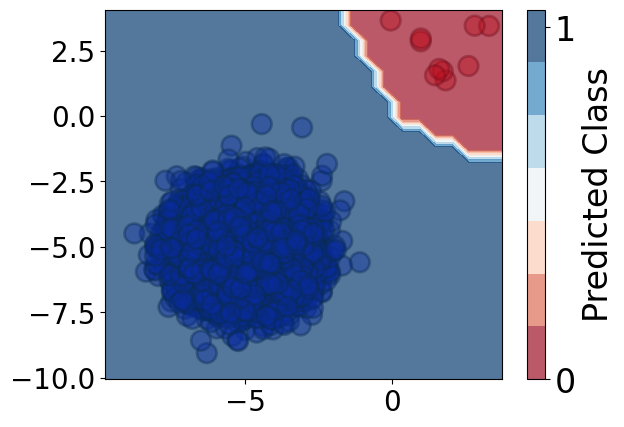

SMOTE


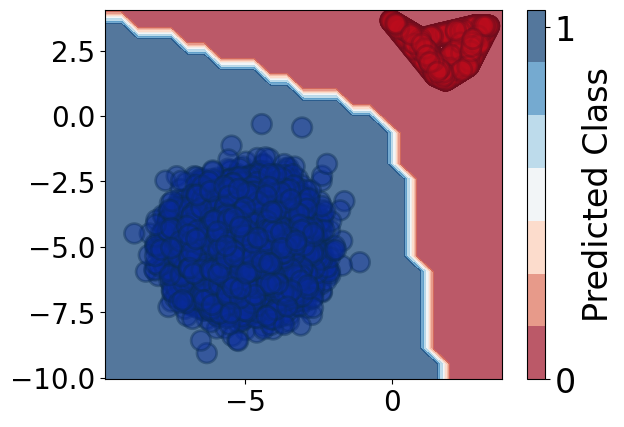

balanced_weights


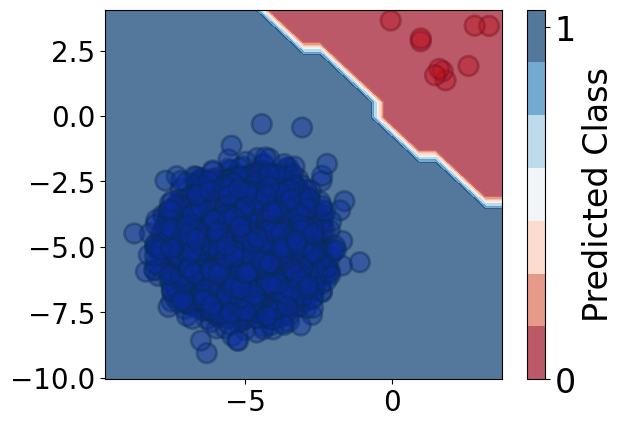

Bayes Minimum Risk


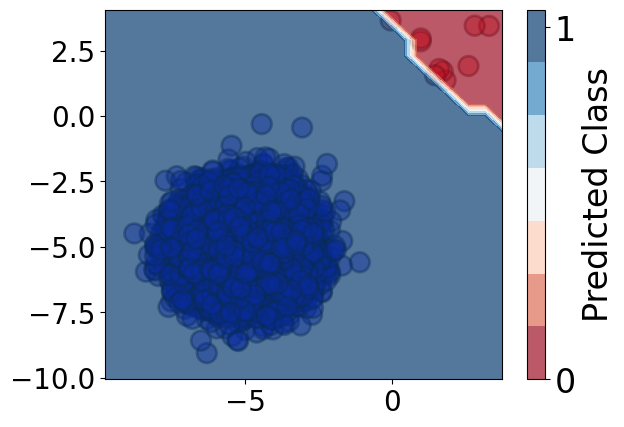

Bayes Minimum Risk (Not calibrated)


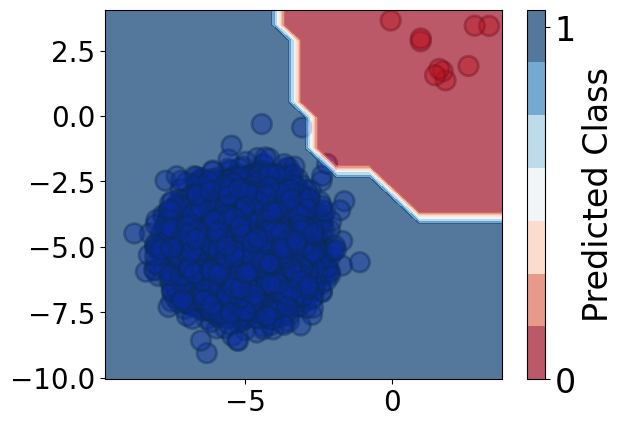

Thresholding


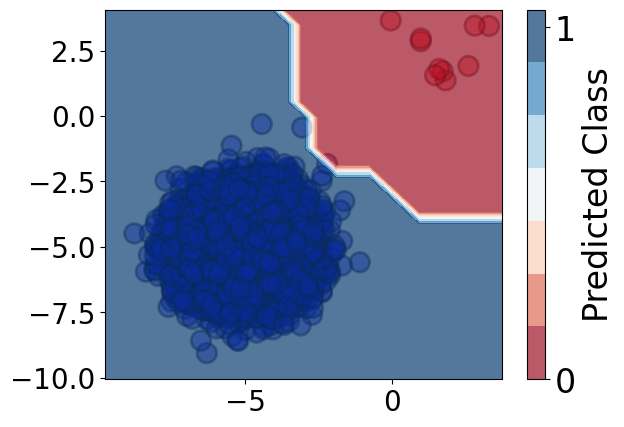

In [32]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
model = 'MLP'

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model)
data_clf['clf'] = classifiers_dict['original']                    

## Fit deltas

deltas init: [0.999999999999999, 2.5479321652493136e-08]
eq. 7 can be satisfied: True
Grid Search Optimisation Complete
    delta1 : 0.0001 
    delta2: 3.2812381358763124e-07
    constraint satisfied: True


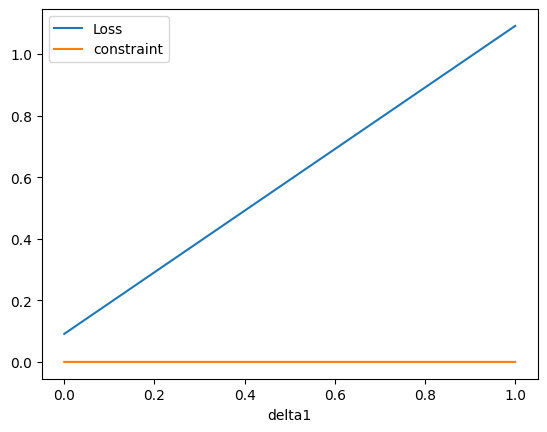

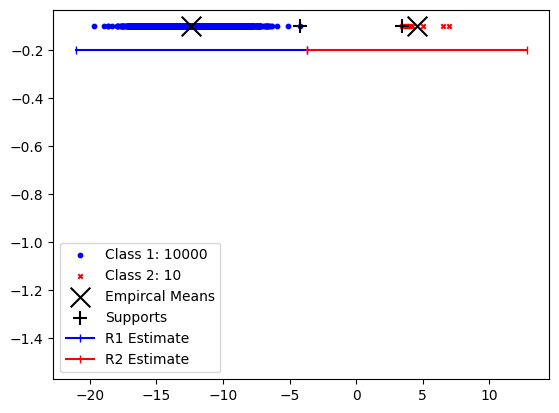

In [23]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = downsample.downsample_deltas(
#     clf).fit(X, y, _print=True, _plot=True, max_trials=10000)
deltas_model = base.base_deltas(
    clf).fit(X, y, grid_search=True, _print=True, _plot=True)

## Plot training data information

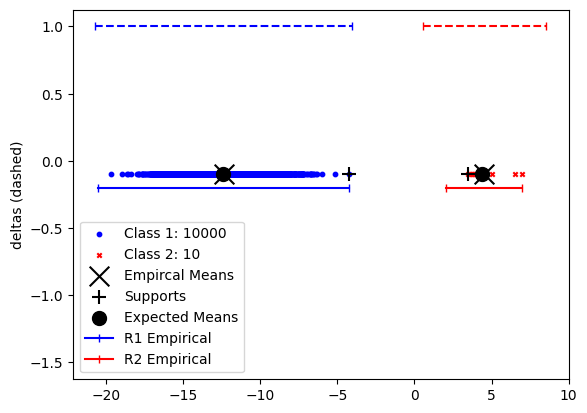

In [24]:
deltas_model.plot_data(data_clf)

## See how classifier's boudnary changes with delta

In [25]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

## Show parameters

In [26]:
deltas_model.print_params()

Parameters
                R:  19.698751580072773
                N1: 10000
                N2: 10
                R1: 8.147495255642916
                R2: 2.461691724904645
                M:  7.698355327268404
                D:  16.932529259835327
                C1: 1
                C2: 1


# Evaluation on test data

/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                     accuracy        F1  precision1 (red)  \
Method                                                                      
original                              0.99155  0.991478          0.983381   
SMOTE                                 0.99985  0.999850          0.999700   
balanced_weights                      0.99975  0.999750          0.999500   
Bayes Minimum Risk                    0.87110  0.852026          0.795039   
Bayes Minimum Risk (Not calibrated)   1.00000  1.000000          1.000000   
Thresholding                          0.50000  0.666667          0.000000   
deltas                                1.00000  1.000000          1.000000   

                                     precision2 (blue)  
Method                                                  
original                                           1.0  
SMOTE                                              1.0  
balanced_weights                                   1.0  
Bayes Minimum Risk   

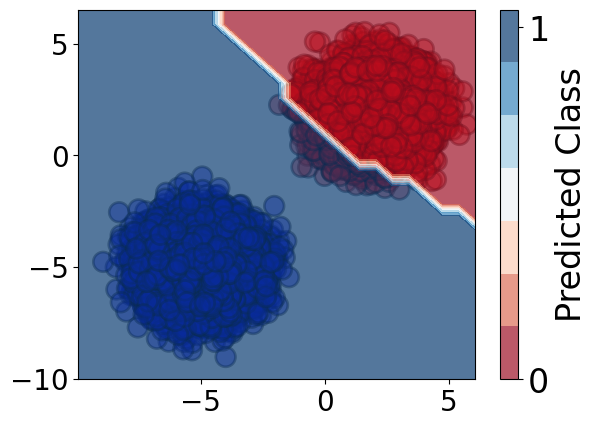

SMOTE


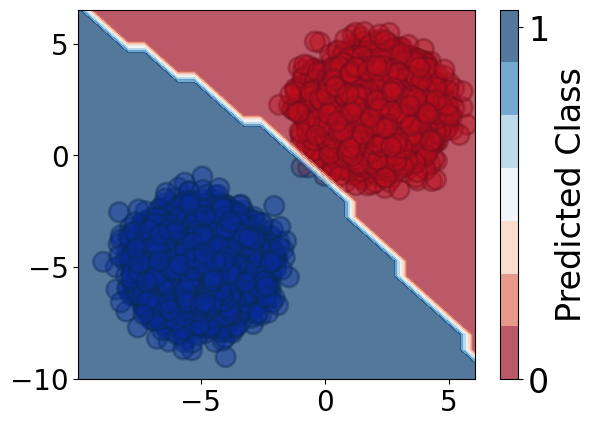

balanced_weights


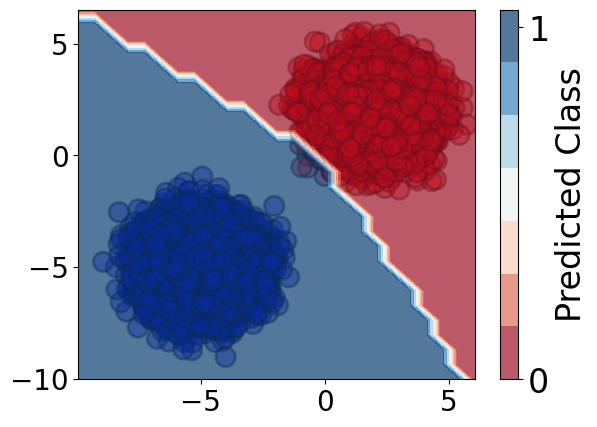

Bayes Minimum Risk


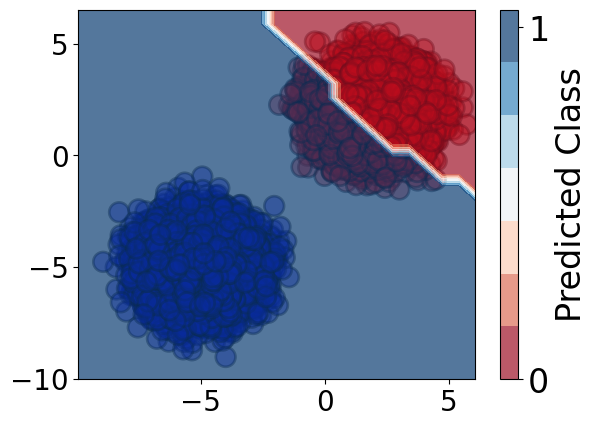

Bayes Minimum Risk (Not calibrated)


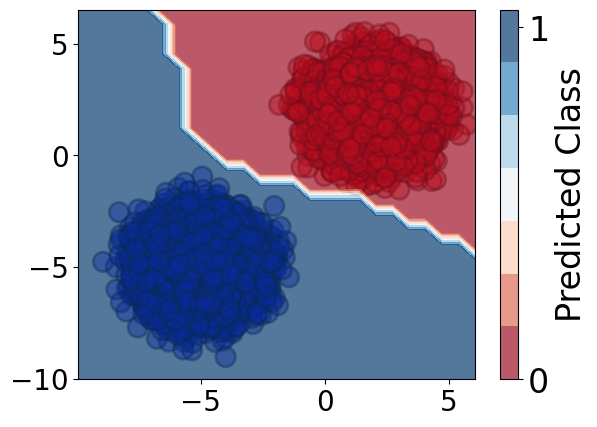

Thresholding


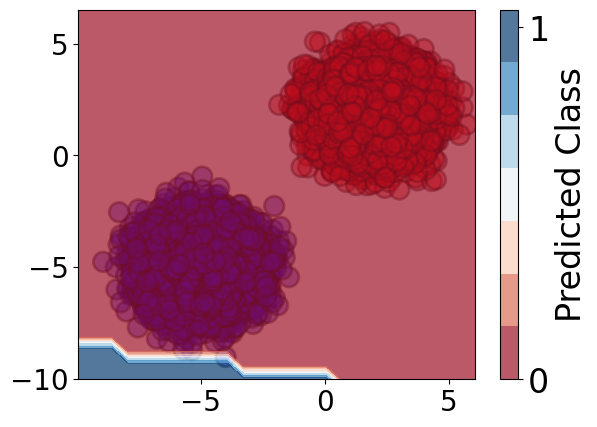

deltas


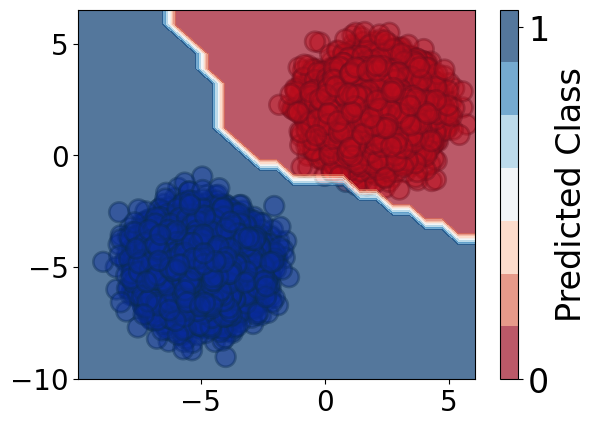

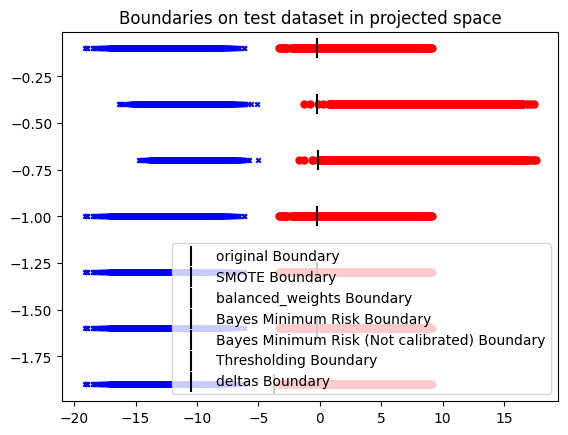

LATEX table format


\begin{tabular}{lrrrr}
\toprule
 & accuracy & F1 & precision1 (red) & precision2 (blue) \\
Method &  &  &  &  \\
\midrule
original & 0.991550 & 0.991478 & 0.983381 & 1.000000 \\
SMOTE & 0.999850 & 0.999850 & 0.999700 & 1.000000 \\
balanced_weights & 0.999750 & 0.999750 & 0.999500 & 1.000000 \\
Bayes Minimum Risk & 0.871100 & 0.852026 & 0.795039 & 1.000000 \\
Bayes Minimum Risk (Not calibrated) & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
Thresholding & 0.500000 & 0.666667 & 0.000000 & 0.500000 \\
deltas & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
\bottomrule
\end{tabular}



,accuracy,F1,precision1 (red),precision2 (blue)
Method,,,,
original,0.99155,0.991478,0.983381,1.0
SMOTE,0.99985,0.999850,0.999700,1.0
balanced_weights,0.99975,0.999750,0.999500,1.0
Bayes Minimum Risk,0.87110,0.852026,0.795039,1.0
Bayes Minimum Risk (Not calibrated),1.00000,1.000000,1.000000,1.0
Thresholding,0.50000,0.666667,0.000000,0.5
deltas,1.00000,1.000000,1.000000,1.0


In [27]:
classifiers_dict['deltas'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)